In [48]:
import pandas as pd

# Exportamos datos

data_sucio_xy = pd.read_csv('csv/DataFinal.csv')

# 1. Preprocesado de los datos

Mapeamos los valores de posiciones a valores numéricos.

In [49]:
# Mapeamos las posiciones

# Diccionario de asignación de valores
mapeo_posiciones = {
  'PO': 1,  # Asigna 1 a la posición "PO"
  'DF': 2,  # Asigna 2 a la posición "DF"
  'CC': 3,  # Asigna 3 a la posición "CC"
  'DL': 4,  # Asigna 4 a la posición "DL"
}

# Función para asignar valores
def asignar_valor(pos):
  valores = mapeo_posiciones.get(pos, 0) # Asigna valores o 0 si no se encuentra en el diccionario
  return valores

# Reemplaza la columna 'Posicion' por los valores asignados
data_sucio_xy['Posicion'] = data_sucio_xy['Posicion'].apply(asignar_valor)
data_sucio_xy.head()

,Jugador,Edad,Temporada,Posicion,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,...,Dist progresiva,Conducciones ultimo tercio,Conducciones en area,Errores de control,Salario semanal,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin
0,Aaron Connolly,19.0,2019,4,5123.0,24.0,14.0,1258.0,3.0,1.0,...,417.0,7.0,12.0,53.0,31990.0,5123.0,15.0,15.0,200.78,200.78
1,Adam Webster,24.0,2019,2,5123.0,31.0,31.0,2668.0,3.0,1.0,...,5013.0,23.0,3.0,19.0,48519.0,5123.0,15.0,15.0,200.78,200.78
2,Alexis Mac Allister,20.0,2019,0,5123.0,9.0,4.0,352.0,0.0,0.0,...,115.0,3.0,1.0,7.0,42653.0,5123.0,15.0,15.0,200.78,200.78
3,Alireza Jahanbakhsh,25.0,2019,0,5123.0,10.0,3.0,311.0,2.0,0.0,...,252.0,5.0,1.0,8.0,69312.0,5123.0,15.0,15.0,200.78,200.78
4,Bernardo,24.0,2019,0,5123.0,14.0,7.0,679.0,0.0,0.0,...,766.0,6.0,1.0,16.0,34656.0,5123.0,15.0,15.0,200.78,200.78


In [50]:
nombres_de_columnas = data_sucio_xy.columns
nombres_de_columnas


Index(['Jugador', 'Edad', 'Temporada', 'Posicion', 'Valor liga ini',
       'Partidos', 'Titularidades', 'Minutos', 'Goles', 'Asistencias',
       'Goles penalti', 'Penaltis lanzados', 'Amarillas', 'Rojas', 'xG',
       'xG sin penaltis', 'xAG', 'Conducciones progresivas',
       'Pases progresivos', 'Pases progresivos recibidos', 'Goles encajados',
       'Disparos recibidos', 'Salvadas', 'Porterias a cero',
       'Penaltis en contra', 'Penaltis encajados', 'Penaltis detenidos',
       'Penaltis fallados (en contra)', '2a amarilla', 'Faltas cometidas',
       'Faltas recibidas', 'Fueras de juego', 'Balones centrados',
       'Intercepciones', 'Entradas ganadas', 'Penaltis concedidos',
       'Goles en propia', 'Recuperaciones', 'Aereos ganados',
       'Aereos perdidos', 'Disparos', 'Tiros a puerta', 'Distancia tiros',
       'Faltas lanzadas', 'Pases completados', 'Pases intentados',
       'Distancia pases', 'Dist progresiva pases', 'Pases cortos completados',
       'Pases cortos 

Agrupamos los equipos para reducir dimensionalidad al codificar.

Reparto de La Liga: https://as.com/futbol/primera/asi-reparte-laliga-los-millones-de-television-en-primera-y-segunda-n/

Reparto en Premier League: https://www.sport.es/es/noticias/premier-league/dinero-ganado-equipo-premier-league-88825234

Reparto en Serie A: https://onefootball.com/en/news/cf-how-much-milan-and-other-serie-a-clubs-earned-from-tv-rights-in-2022-23-37672831

Como podemos observar las ligas reparten una parte del dinero de manera equitativa y otra según el rendimiento liguero de los equipos, aunque existen otras fuentes de financiación para los equipos aquí lo simplificaremos a los ingresos por rendimiento deportivo y por ende agruparemos a los equipos de las distintas ligas en 5 grupos según su media de puntos en las últimas 3 campañas.

In [51]:
# Ya hecho en el fichero RefinaDatos.ipynb
data_xy = data_sucio_xy

Codificamos variables categóricas.

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split # para dividir el dataset en los conjuntos de train y test

x = data_xy.drop(['Jugador', 'Temporada', 'Salario semanal'], axis=1)
y = data_xy['Salario semanal']

print("El número de instancias del problema es: " + str(x.shape[0]))

print("El número de características del problema es: " + str(x.shape[1]))

# Codificamos antes de separar
categoricas_indices = ['Posicion']
continuas_indices = [col for col in x.columns if col not in categoricas_indices]

# Codificación dummy
x_cod = pd.get_dummies(x, columns=categoricas_indices, drop_first=True)

print("El nuevo número de características del problema tras codifciar las variables categóricas es: " + str(x_cod.shape[1]))

# Actualizamos los nuevos índices de las variables categóricas
categoricas_indices = [col for col in x_cod.columns.tolist() if col not in continuas_indices]

El número de instancias del problema es: 10786
El número de características del problema es: 70
El nuevo número de características del problema tras codifciar las variables categóricas es: 73


# 2. Análisis de los datos

Separamos en test y train para evitar data snooping.

In [53]:
# Antes de cualquier visualización separamos en entrenamiento y test (para no hacer nada con test y evitar el data snooping)
x_train, x_test, y_train, y_test = train_test_split(x_cod, y, test_size=0.1, random_state=0)

# Visualizamos los datos de entrenamiento
print('El número de instancias para el entrenamiento es: ', x_train.shape[0])
print('El número de instancias para el test es: ' , x_test.shape[0])

El número de instancias para el entrenamiento es:  9707
El número de instancias para el test es:  1079


Como tenemos un dataset de tamaño medio selecciono el 10% de la muestra para test, para así tener una buena cantidad de datos para entrenar nuestros modelos y bastantes datos para luego comprobar como funcionaría el modelo elegido para datos de fuera de la muestra.

Resumen de los datos.

In [54]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = x_train[columna].count()
    rango_valores = f"{x_train[columna].min()} - {x_train[columna].max()}"
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                                  Media  Mediana  Desviación Típica   Máximo  Mínimo  Valores Faltantes
Edad                              25.32     25.0               4.27     41.0    15.0                0.0
Valor liga ini                  3328.69   3114.0            1439.90   6605.0  1598.0                0.0
Partidos                          22.90     25.0              10.40     50.0     1.0                0.0
Titularidades                     18.03     18.0              10.94     38.0     0.0                0.0
Minutos                         1610.47   1627.0             939.94   3420.0     1.0                0.0
Goles                              2.36      1.0               3.85     41.0     0.0                0.0
Asistencias                        1.63      1.0               2.28     21.0     0.0                0.0
Goles penalti                      0.22      0.0               0.87     14.0     0.0                0.0
Penaltis lanzados     

Respecto a los datos continuos, podemos observar por un lado que algunas variables tienen intervalos muy grandes, convendría escalarlos para facilitar el trabajo de los modelos de aprendizaje, en especial modelos como KNN que trabajan con las distancias entre puntos. Por otro lado podemos observar también que no existen datos faltantes.

En cuanto a las variables categóricas observamos simplemente el resultado de haber aplicado dummy encoding a las mismas, nos ha creado una serie de variables binarias donde se almacena la información acerca de posición y competiciones del jugador en cuestión.

Histograma con la cantidad de jugadores por posición.

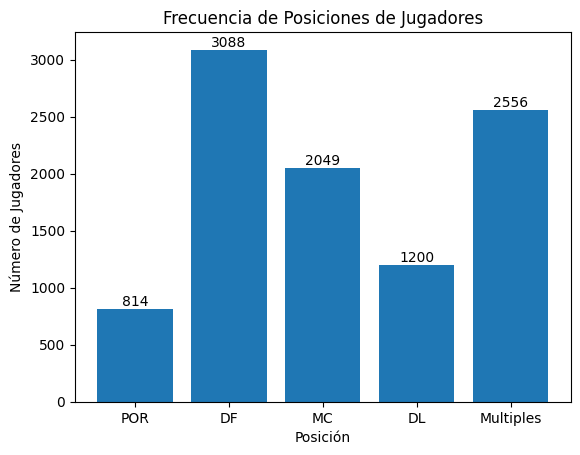

In [55]:
import matplotlib.pyplot as plt

# Calcular la cantidad de jugadores por posición
frecuencia_posiciones = x_train[['Posicion_1', 'Posicion_2', 'Posicion_3', 'Posicion_4']].sum(axis=0)

# Agregar una barra para jugadores con múltiples posiciones
frecuencia_posiciones['Múltiple'] = len(x_train) - frecuencia_posiciones.sum()

# Crear una figura y un eje
fig, ax = plt.subplots()
tags = ['POR', 'DF', 'MC', 'DL', 'Multiples']

# Añadir barras al gráfico
ax.bar(tags, frecuencia_posiciones)

# Configurar etiquetas y título
ax.set_xlabel('Posición')
ax.set_ylabel('Número de Jugadores')
ax.set_title('Frecuencia de Posiciones de Jugadores')

# Añadir etiquetas con el número exacto de jugadores encima de las barras
for i, count in enumerate(frecuencia_posiciones):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Podemos observar que tenemos una cantidad bastante reducida de porteros y delanteros en comparación con el resto de posiciones, no obstante creo que es una cantidad significativa de muestras.

Distribución de salarios por posición.

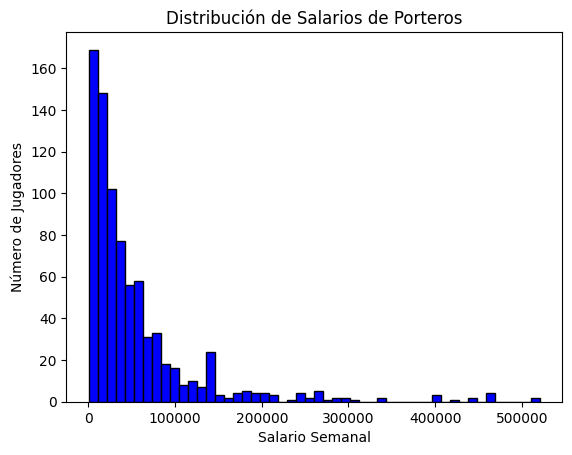

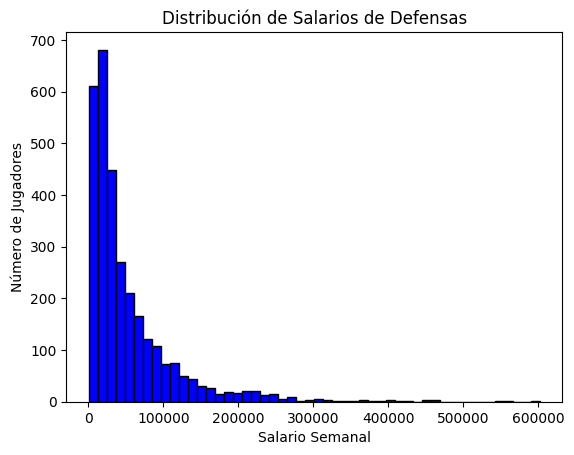

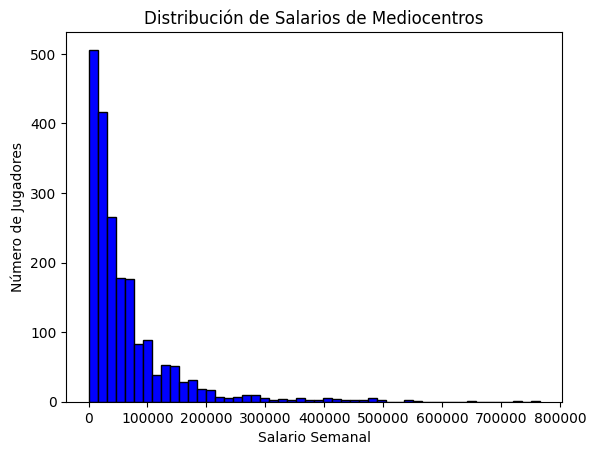

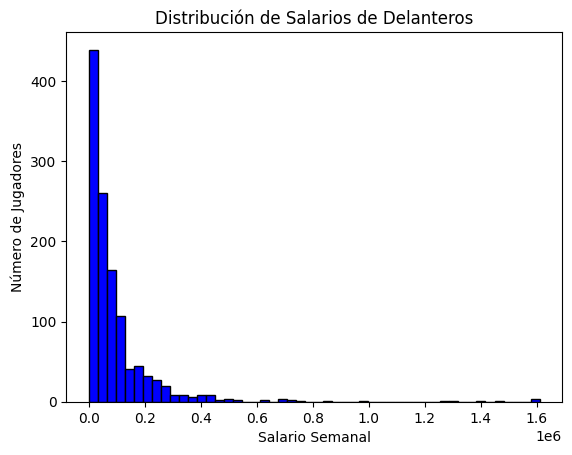

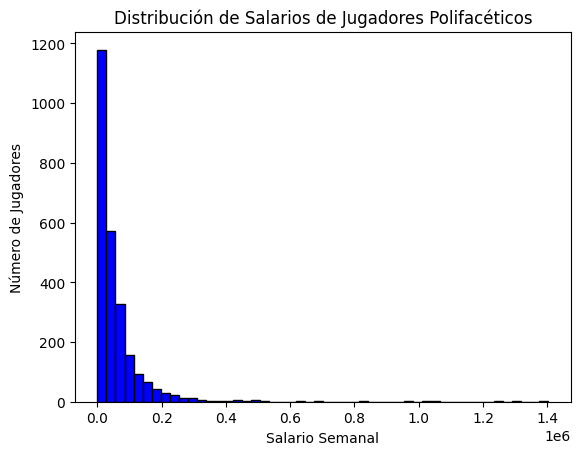

In [56]:
# Índices por posición
c1 = x_train["Posicion_1"]
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]
c5 = (x_train["Posicion_1"] == 0) & (x_train["Posicion_2"] == 0) & (x_train["Posicion_3"] == 0) & (x_train["Posicion_4"] == 0)

salarios = y_train

# Crea un histograma de los salarios
# Porteros
plt.hist(salarios[c1], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Porteros')

# Muestra el gráfico
plt.show()

# Defensas
plt.hist(salarios[c2], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.hist(salarios[c3], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.hist(salarios[c4], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

# Múltiple
plt.hist(salarios[c5], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores Polifacéticos')

# Muestra el gráfico
plt.show()

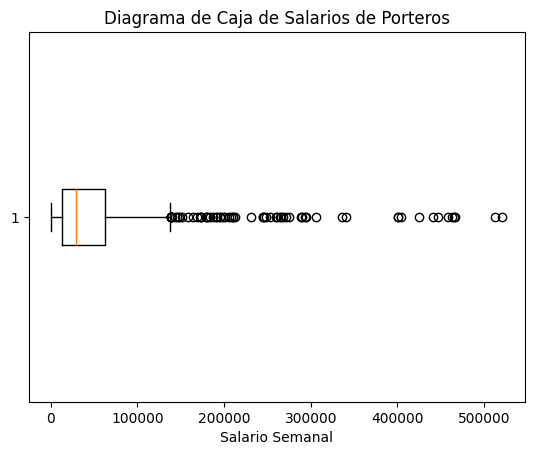

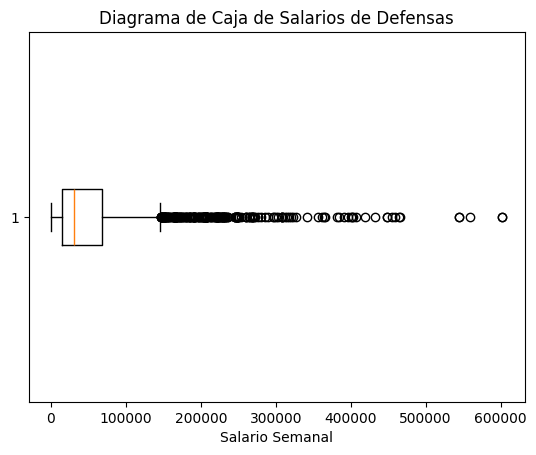

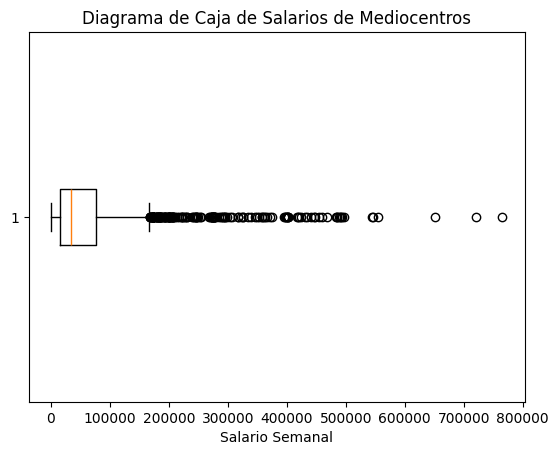

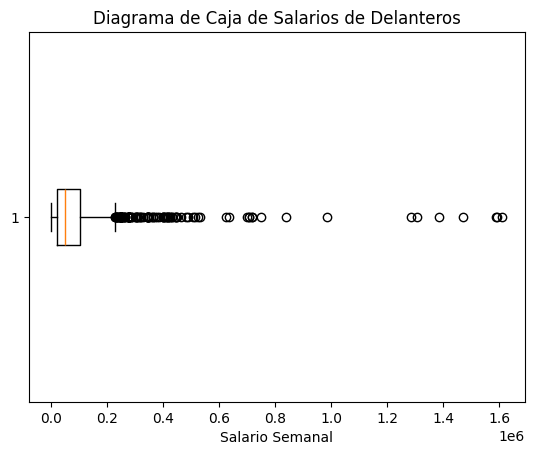

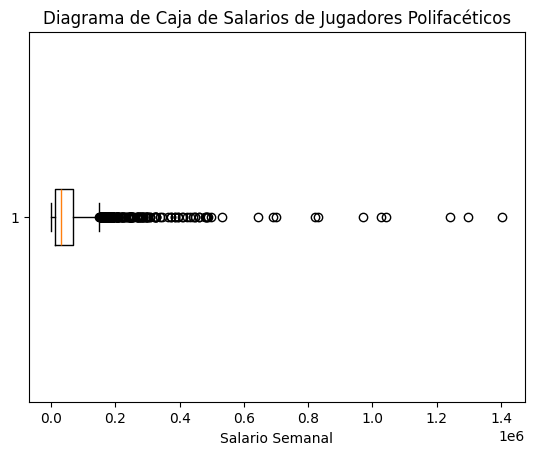

In [57]:
# Crea un diagrama de caja de los salarios
# Porteros
plt.boxplot(salarios[c1], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Porteros')

# Muestra el gráfico
plt.show()

# Defensas
plt.boxplot(salarios[c2], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.boxplot(salarios[c3], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.boxplot(salarios[c4], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

# Múltiples
plt.boxplot(salarios[c5], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Jugadores Polifacéticos')

# Muestra el gráfico
plt.show()

Podemos ver que para todas las posiciones existen salarios que están muy por encima de la media, aunque en distintas magnitudes dependiendo de la posición, vemos que los delanteros son los que más cobran y los porteros los que menos.

In [58]:
# Define las columnas y los índices para el DataFrame
indices = ['Portero', 'Defensa', 'Mediocentro', 'Delantero', 'Jugadores Polifacéticos', 'Total']
columnas = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Crea un DataFrame con los cuartiles
cuartiles_df = pd.DataFrame(index=indices, columns=columnas)

# Llena el DataFrame con los cuartiles
cuartiles_df.loc['Portero', :] = y_train[c1].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Defensa', :] = y_train[c2].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Mediocentro', :] = y_train[c3].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Delantero', :] = y_train[c4].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Jugadores Polifacéticos', :] = y_train[c5].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Total', :] = y_train.describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values

# Muestra el DataFrame
cuartiles_df

,count,mean,std,min,25%,50%,75%,max
Portero,814.0,54690.701474,73521.529488,408.0,12539.0,29295.5,62822.75,520734.0
Defensa,3088.0,53453.056347,65113.560251,296.0,14994.0,31349.0,67830.0,601914.0
Mediocentro,2049.0,63867.792582,82293.084373,296.0,15856.0,34715.0,76310.0,765144.0
Delantero,1200.0,94207.9,151226.872726,296.0,21407.5,50105.5,104277.5,1609609.0
Jugadores Polifacéticos,2556.0,58237.461659,91398.211371,296.0,13455.25,31830.0,68244.0,1403262.0
Total,9707.0,62053.240754,91731.906291,296.0,14994.0,33812.0,73454.0,1609609.0


Aquí vemos más claro la diferencia del salario máximo entre posiciones, viendolo así observamos que la diferencia entre salarios de porteros, defensas y centrocampistas no es muy grande, al igual que la media, y que verdaderamente la posición más outlier es la de delantero. En cuanto a los jugadores con varias posiciones, al incluir todo tipo de posiciones no es más que una representación del total del conjunto cuyas estadísticas son similares a las del total.

Distribución en cuartiles y de gráfico de barras de la variable a predecir.

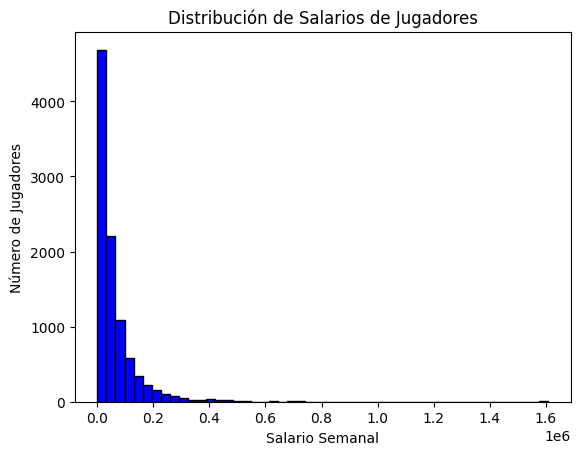

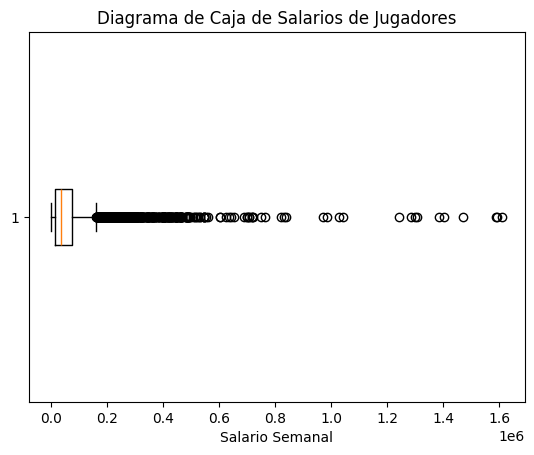

count    9.707000e+03
mean     6.205324e+04
std      9.173191e+04
min      2.960000e+02
25%      1.499400e+04
50%      3.381200e+04
75%      7.345400e+04
max      1.609609e+06
Name: Salario semanal, dtype: float64


In [59]:
# Crea un histograma de los salarios
plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Crea un diagrama de caja de los salarios
plt.boxplot(salarios, vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

**Conclusiones**

* Se cumple ley de la potencia, muchos valores pequeños, pero probabilidad de obtener algunos valores muy grandes, como se puede observar en el gráfico de barras o en el de caja.
* Los 3 percentiles están a distancias similares unos de otros, así como con el valor mínimo, hasta aquí bastante balanceados los datos. Existe no obstante una distancia mucho mayor con respecto al máximo.
* Tanto en el diagrama de caja como en el de barras se puede observar fácilmente que existe una cantidad significativa de jugadores con sueldos mucho mayores a los de la mayoría.

Escalamos logarítmicamente la variable a predecir, para paliar el efecto de la cola alargada y mejorar la distribución de valores de la variable.

https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

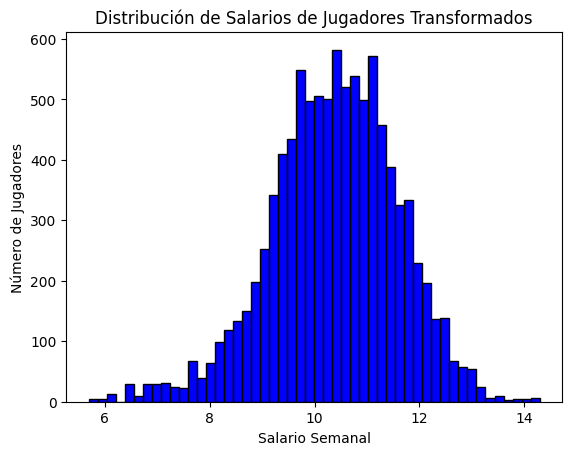

count    9707.000000
mean       10.375689
std         1.211775
min         5.693732
25%         9.615472
50%        10.428601
75%        11.204428
max        14.291502
Name: Salario semanal, dtype: float64


In [60]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Crea un histograma de los salarios
salarios = y_train_log

plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores Transformados')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train_log.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

Ahora la distribución se asemeja mucho más a la distribución gaussiana, lo que puede ayudar al entrenamiento de los modelos y todos los percentiles están mucho más equilibrados, lo que ayuda a evitar que valores atípicos o extremos influyan más de lo debido en la construcción del modelo.

Observamos distribución de datos antes de tratar.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

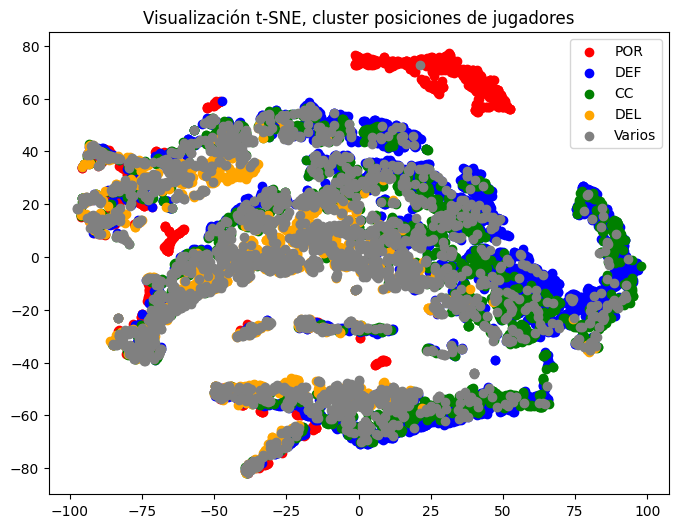

In [15]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train)

# Colores para cada condición
c1 = x_train["Posicion_1"]
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]
c5 = (x_train["Posicion_1"] == 0) & (x_train["Posicion_2"] == 0) & (x_train["Posicion_3"] == 0) & (x_train["Posicion_4"] == 0)

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_1'
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR", c='red')

# Scatter plot para 'Posicion_2'
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="DEF", c='blue')

# Scatter plot para 'Posicion_3'
plt.scatter(X_tsne[c3 == 1, 0], X_tsne[c3 == 1, 1], label="CC", c='green')

# Scatter plot para 'Posicion_4'
plt.scatter(X_tsne[c4 == 1, 0], X_tsne[c4 == 1, 1], label="DEL", c='orange')

# Scatter plot para ninguna de las condiciones anteriores
plt.scatter(X_tsne[c5, 0], X_tsne[c5, 1], label="Varios", c='gray')

plt.title("Visualización t-SNE, cluster posiciones de jugadores")

# Agregar leyenda
plt.legend(loc="upper right")

plt.show()

Podemos ver que el cluster independiente pertenece a los porteros.

Vamos a ver el cluster solo de porteros para observar más claramente como hay varios conjuntos claramente diferenciados

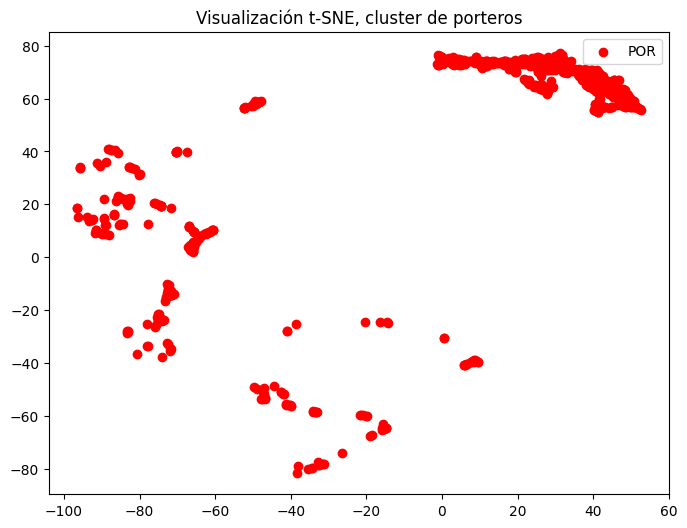

In [16]:
c1 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_1'
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc='upper right')
plt.show()

Observamos un conjunto mayoritario y luego varios porteros más alejados, mi teoría tras haber observado tanto el digrama de caja como los percentiles es que esos porteros separados del cluster corresponden a los que mayor salario tienen, por lo que voy a añadir la condición de que solo se plotteen los porteros con un salario inferior a 300000 euros, que según he visto en el diagrama de barras de los porteros, es más o menos donde empieza el hueco entre el conjunto inferior mayoritario y los porteros que más cobran.

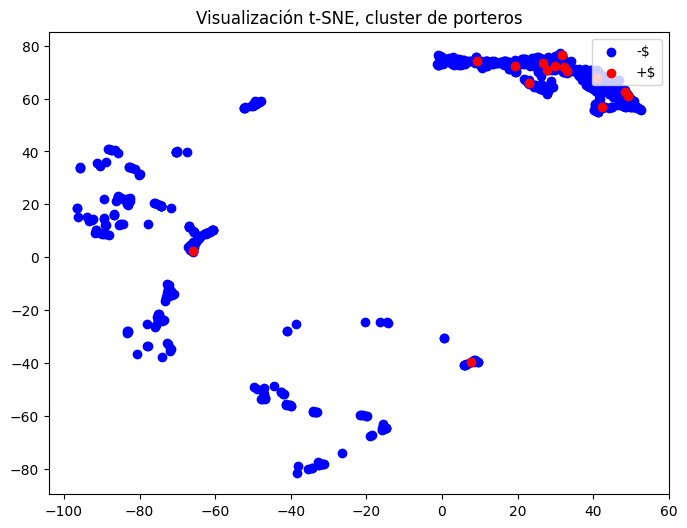

In [17]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & (y_train > 300000)
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

# Scatter plot para porteros que menos cobran
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="-$", c='blue')
# Scatter plot para porteros que más cobran
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="+$", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

La teoría no era correcta, entiendo entonces que los porteros anómalos son tal debido a que tienen unas estadísticas muy diferenciadas del resto.

Decido entonces volver a mostrar un resumen de los datos, pero solo de los porteros para ver si consigo sacar algo en claro.

In [18]:
# Crear un nuevo DataFrame con los porteros
porteros_df = x_train.loc[x_train['Posicion_1'] == True].copy()

print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(porteros_df[columna].mean(), 2)
    mediana = round(porteros_df[columna].median(), 2)
    desviacion_tipica = round(porteros_df[columna].std(), 2)
    maximo = round(porteros_df[columna].max(), 2)
    minimo = round(porteros_df[columna].min(), 2)
    valores_faltantes = porteros_df[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = porteros_df[columna].count()
    rango_valores = f"{porteros_df[columna].min()} - {porteros_df[columna].max()}"
    valores_faltantes = porteros_df[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS



                                  Media   Mediana  Desviación Típica   Máximo  Mínimo  Valores Faltantes
Edad                              27.98     28.00               4.57     41.0    17.0                0.0
Valor liga ini                  3269.88   3073.00            1401.22   6605.0  1598.0                0.0
Partidos                          20.14     23.00              14.04     38.0     1.0                0.0
Titularidades                     19.97     22.00              14.18     38.0     0.0                0.0
Minutos                         1795.84   2046.50            1267.93   3420.0     1.0                0.0
Goles                              0.00      0.00               0.04      1.0     0.0                0.0
Asistencias                        0.05      0.00               0.24      2.0     0.0                0.0
Goles penalti                      0.00      0.00               0.04      1.0     0.0                0.0
Penaltis lanzados                  0.00      0.00      

Viendo esto vemos que hay porteros que han marcado goles, hecho asistencias o regateado, cosas que son poco comunes y tal vez sea lo que les separe del cluster de porteros, vamos a verlo.

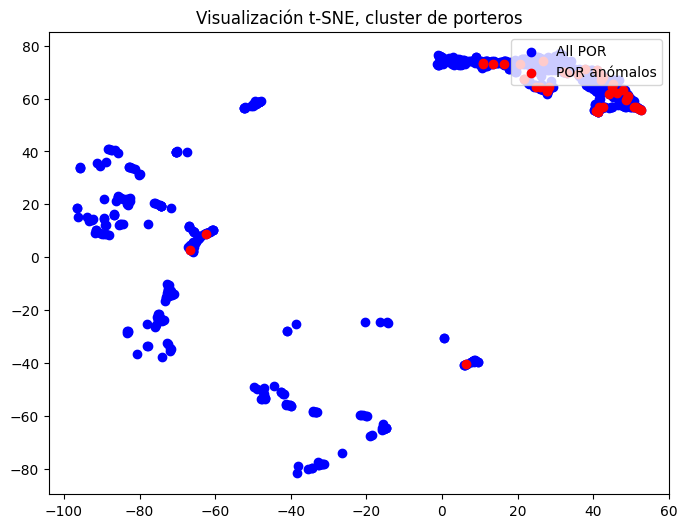

In [19]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & ((x_train['Goles'] > 0) | (x_train['Asistencias'] > 0))
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="All POR", c='blue')
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR anómalos", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

Tampoco es el caso, como no doy con lo que es decido ver a que datos pertenecen esos puntos más alejados para ver como son sus estadísticas, para ello como estos puntos tienen la peculiaridad de que su coordenada x es menor que 0, uso esto para identificarlos.

In [20]:
# Guardamos la coordenada x
x_coord = X_tsne[:, 0]

PORdf = c2.to_frame()
PORdf['X'] = x_coord

# Filtrar las filas que cumplen con las condiciones
indices_filtrados = x_train[(PORdf['X'] < 0) & (PORdf['Posicion_1'] == True)]

# Imprimir los porteros anómalos
indices_filtrados


,Edad,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,Goles penalti,Penaltis lanzados,Amarillas,...,Errores de control,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
3161,31.0,3208.0,8.0,8.0,720.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3208.0,7.0,7.0,207.60,207.60,True,False,False,False
2092,31.0,2350.0,1.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2350.0,4.0,4.0,642.50,642.50,True,False,False,False
8759,33.0,5498.0,3.0,3.0,270.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5498.0,3.0,3.0,969.65,969.65,True,False,False,False
1261,39.0,6442.0,2.0,2.0,180.0,0.0,0.0,0.0,0.0,1.0,...,0.0,6442.0,15.0,15.0,274.30,274.30,True,False,False,False
655,31.0,2600.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2600.0,5.0,5.0,338.38,338.38,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,30.0,5498.0,7.0,7.0,630.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5498.0,10.0,11.0,511.20,430.75,True,False,False,False
8393,22.0,2057.0,10.0,10.0,900.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2057.0,20.0,15.0,73.63,135.28,True,False,False,False
9396,33.0,3149.0,1.0,1.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3149.0,10.0,10.0,236.80,236.80,True,False,False,False
9781,22.0,3277.0,2.0,2.0,180.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3277.0,1.0,1.0,770.75,770.75,True,False,False,False


Viendo el resultado parece que los porteros anómalos son porteros que han jugado pocos minutos, vamos a comprobarlo.

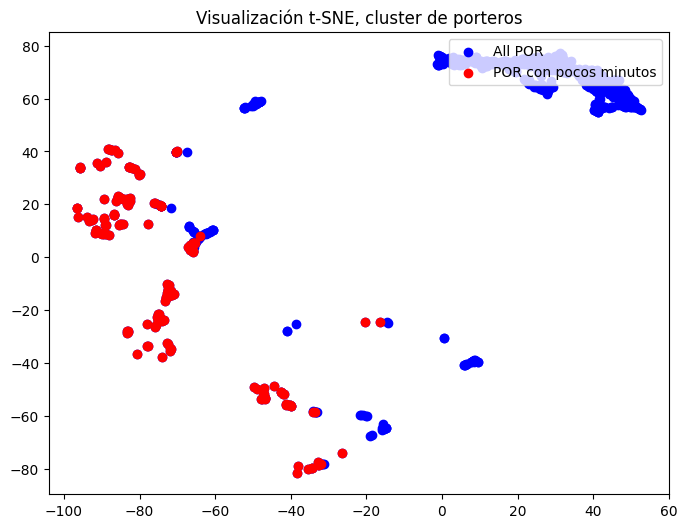

In [21]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & (x_train['Minutos'] < 271)
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="All POR", c='blue')
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR con pocos minutos", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

Queda confirmado que los porteros anómalos son porteros que han jugado pocos minutos, puede que se de el mismo problema para otras posiciones.

A continuación vamos a normalizar los datos. Esto es importante para que estén todos en un mismo rango de valores. La importancia de escalarlos es:

*   Evitar que algunas características dominen sobre otras
*   Mejorar la convergencia en algunos algoritmos como descenso de gradiente

Las variables categóricas ya se mueven en un rango entre 0 y 1 por tanto solo vamos a normalizar las variables continuas. Para ello utilizaremos el método de normalización que consiste en para cada valor x de la columna, restarle el mínimo de la columna y dividir entre el máximo menos el mínimo de la columna:
<center> $z = \frac{{x - x_{min}}}{{x_{max}-x_{min}}}$ </center>

Las variables del test también se normalizan y para ello se utilizan los factores usados en entrenamiento para normalizar.

----

Para estandarizar las variables utilizaremos las siguientes funciones de scikit-learn:

**MinMaxScaler().fit(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se guardan los factores de mínimo y máximo de X en la clase MinMaxScaler

---

**MinMaxScaler().transform(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se transforma X con los factores de mínimo y máximo de la clase MinMaxScaler

In [61]:
from sklearn.preprocessing import MinMaxScaler # para normalizar

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador utilizando los datos de train
scaler.fit(x_train[continuas_indices])

# Guardamos el dataset sin normalizar
x_train_noNorm = x_train.copy()

# Escalamos train y test con los factores de train
x_train[continuas_indices] = scaler.transform(x_train[continuas_indices])
x_test[continuas_indices] = scaler.transform(x_test[continuas_indices])

Comprobamos que se ha normalizado bien mediante un resumen de las variables continuas.

In [23]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo y mínimo
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

TABLA RESUMEN DE LAS VARIABLES CONTINUAS



                               Media  Mediana  Desviación Típica  Máximo  Mínimo
Edad                            0.40     0.38               0.16     1.0     0.0
Valor liga ini                  0.35     0.30               0.29     1.0     0.0
Partidos                        0.45     0.49               0.21     1.0     0.0
Titularidades                   0.47     0.47               0.29     1.0     0.0
Minutos                         0.47     0.48               0.27     1.0     0.0
Goles                           0.06     0.02               0.09     1.0     0.0
Asistencias                     0.08     0.05               0.11     1.0     0.0
Goles penalti                   0.02     0.00               0.06     1.0     0.0
Penaltis lanzados               0.02     0.00               0.07     1.0     0.0
Amarillas                       0.19     0.18               0.17     1.0     0.0
Rojas                           0.04     0.00               0.10     1.0     0.0
xG                          

# 3. Procesado de los datos

En esta ocasión en vez de usar PCA para reducir dimensionalidad, vamos a usar algoritmos de selección de características para reducir la dimensionalidad seleccionando las características más relevantes, compararé los resultados de todos los que use y me quedaré con el subconjunto de características que mejor desempeño tenga.

### Mutual Information for Feature Selection (MIFS)

El algoritmo MIFS es una técnica de selección de características que se basa en la información mutua entre cada característica y la variable objetivo. La información mutua mide la dependencia entre dos variables y es especialmente útil cuando estas variables son de naturaleza discreta o categórica.

En el contexto de la selección de características, la información mutua se utiliza para cuantificar cuánta información sobre la variable objetivo se puede obtener a partir de cada característica individual. Cuanto mayor sea la información mutua entre una característica y la variable objetivo, más relevante será esa característica para predecir la variable objetivo.

El algoritmo MIFS funciona de la siguiente manera:

Calcula la información mutua entre cada característica y la variable objetivo.
Selecciona un subconjunto de características que maximiza la información mutua colectiva con la variable objetivo.
Utiliza algún criterio de optimización (por ejemplo, un algoritmo de búsqueda) para encontrar este subconjunto de características.

Usamos la implementación del mismo disponible en scikit-learn, para ello usamos la función SelectKBest, que selecciona las k mejores características en base a una función, en nuestro caso MISF, la cual importamos también de scikit-learn llamando a mutual_info_regression.

### Pearson’s r

La correlación de Pearson es una medida de la fuerza y dirección de la relación lineal entre dos variables. Para problemas de regresión, la función r_regression calcula la correlación de Pearson entre cada característica y la variable objetivo.

Es otra de las funciones que probaremos a maximizar en la selección de características.

### F-value

Esta es otra función de puntuación para usar con técnicas de selección de características. Esta función también se utiliza específicamente para problemas de regresión y calcula la estadística F y los p-values asociados entre cada característica y la variable objetivo.

La estadística F se utiliza para probar la hipótesis nula de que la relación entre la variable independiente (característica) y la variable dependiente (variable objetivo) es insignificante. Los p-values proporcionan una medida de la significancia estadística de esta prueba.

In [23]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, r_regression, f_regression

# Creamos y guardamos en una lista los distintos modelos con distintas características a quedarse (k)
Misf = []
PearsonR = []
FValue = []

for k in range(10, 51, 10): # Número de características a seleccionar
    Misf.append(SelectKBest(score_func=mutual_info_regression, k=k)) 
    Misf[-1].fit(x_train, y_train_log)

    PearsonR.append(SelectKBest(score_func=r_regression, k=k)) 
    PearsonR[-1].fit(x_train, y_train_log)

    FValue.append(SelectKBest(score_func=f_regression, k=k)) 
    FValue[-1].fit(x_train, y_train_log)

#x_train_selected = selector.fit_transform(x_train, y_train_log)
#x_test_selected = selector.transform(x_test)
#x_train.columns[selector.get_support()]

Ahora necesitamos comparar los distintos algoritmos de selección de características y seleccionar el mejor, para ello vuelvo a usar CV como en anteriores ocasiones, de nuevo también usaré 5 folds. Lo único que cambia es que he de modificar la anterior función para poder realizar la selección de características y trabajar con ellas.

Como modelo a entrenar para la comparación he seleccionado GradientBoosting sin selección de hiperparámetros, elijo este modelo ya que anteriormente hemos observado que nos da bastante buenos resultados, así como que nos puede proporcionar la explicabilidad de las características, cosa más complicada si uso un MLP por ejemplo.

El único hiperparámetro que marco es el número de estimadores que se generen, lo dejo a 50 ya que en anteriores pruebas he observado que es consistente a la par que veloz.

In [24]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

# Definir el objeto KFold con 5 folds
folds = 5
kf = KFold(n_splits=folds)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def crossValidation(model, kFolds, dataset_x, dataset_y, train_stats=False):
  mae = 0
  mse = 0
  r2 = 0
  mae_tr = 0
  mse_tr = 0
  r2_tr = 0

  # Transformar los dataset a numpy
  x = dataset_x
  y = dataset_y.to_numpy()

  for train_index, val_index in kFolds.split(x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    train_x_fold, val_x_fold = x[train_index], x[val_index]
    train_y_fold, val_y_fold = y[train_index], y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(train_x_fold, train_y_fold)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(val_x_fold)

    # Calcular el MSE medio
    mse += mean_squared_error(val_y_fold, pred_y)

    # Calcular el MAE medio
    mae += mean_absolute_error(val_y_fold, pred_y)

    # Calcular el Coeficiente de determinación
    r2 += r2_score(val_y_fold, pred_y)

    # Calcular errores para train
    if train_stats:
      pred_y = model.predict(train_x_fold)

      mse_tr += mean_squared_error(train_y_fold, pred_y)
      mae_tr += mean_absolute_error(train_y_fold, pred_y)
      r2_tr += r2_score(train_y_fold, pred_y)

  if train_stats:
    return model, mse/folds, mae/folds, r2/folds, mse_tr/folds, mae_tr/folds, r2_tr/folds
  else:
    return model, mse/folds, mae/folds, r2/folds

In [25]:
import seaborn as sns

def graficaComparacion(valores, titulos, categorias, titulo='Gráfica comparativa de métricas'):
  sns.set(rc = {'figure.figsize':(10,8)})

  # Configurar los valores de las barras y su posición en el eje x
  num_variables = len(valores)
  x = np.arange(len(categorias))
  ancho_barras = 0.5 / num_variables

  # Crear la figura y los ejes
  fig, ax = plt.subplots()

  # Ir añadiendo las barras de los distintos modelos
  for i in range(num_variables):
    desplazamiento = i * ancho_barras
    barras = ax.bar(x + desplazamiento, valores[i,:], ancho_barras, label=titulos[i])
    for barra in barras:
        altura = round(barra.get_height(), 3)
        if num_variables < 4:
          ax.annotate(altura, xy=(barra.get_x() + barra.get_width() / 2, altura),
                      xytext=(0, 3),  # Desplazamiento de la etiqueta (opcional)
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=8)

  # Etiquetas de las categorías en el eje x
  ax.set_xticks(np.arange(len(categorias)) + (num_variables - 1) * ancho_barras / 2)
  ax.set_xticklabels(categorias)

  # Leyenda y título del gráfico
  ax.legend()
  plt.title(titulo)

  # Mostrar el gráfico
  plt.show()

In [26]:
from tabulate import tabulate

def tablaComparacion(valores, categorias, titulos, titulo='Métricas de error'):
  # Imprimir la tabla
  metricas = []
  titulos2 = titulos.copy()
  titulos2.insert(0, titulo)
  for i in range(len(valores[0])):
    fila = []
    fila.append(categorias[i])
    for j in range(len(valores)):
      fila.append(valores[j][i])
    metricas.append(fila)

  print(tabulate(metricas, headers=titulos2, tablefmt="fancy_grid"))

In [30]:
# Aplicamos CV a nuestros subconjuntos para obtener sus métricas de error
Misf_results = []
PearsonR_results = []
FValue_results = []

for i in range(len(Misf)):
    Misf_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, Misf[i].transform(x_train), y_train_log, False))
    PearsonR_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, PearsonR[i].transform(x_train), y_train_log, False))
    FValue_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, FValue[i].transform(x_train), y_train_log, False))

Misf_all = np.vstack((Misf_results[0][1:], Misf_results[1][1:], Misf_results[2][1:], Misf_results[3][1:], Misf_results[4][1:]))
PearsonR_all = np.vstack((PearsonR_results[0][1:], PearsonR_results[1][1:], PearsonR_results[2][1:], PearsonR_results[3][1:], PearsonR_results[4][1:]))
FValue_all = np.vstack((FValue_results[0][1:], FValue_results[1][1:], FValue_results[2][1:], FValue_results[3][1:], FValue_results[4][1:]))

### Resultados de MISF

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.61541  │ 0.485345 │ 0.469165 │ 0.467102 │ 0.467232 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.583909 │ 0.528186 │ 0.516402 │ 0.515273 │ 0.515059 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.580698 │ 0.669431 │ 0.680464 │ 0.681851 │ 0.68177  │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


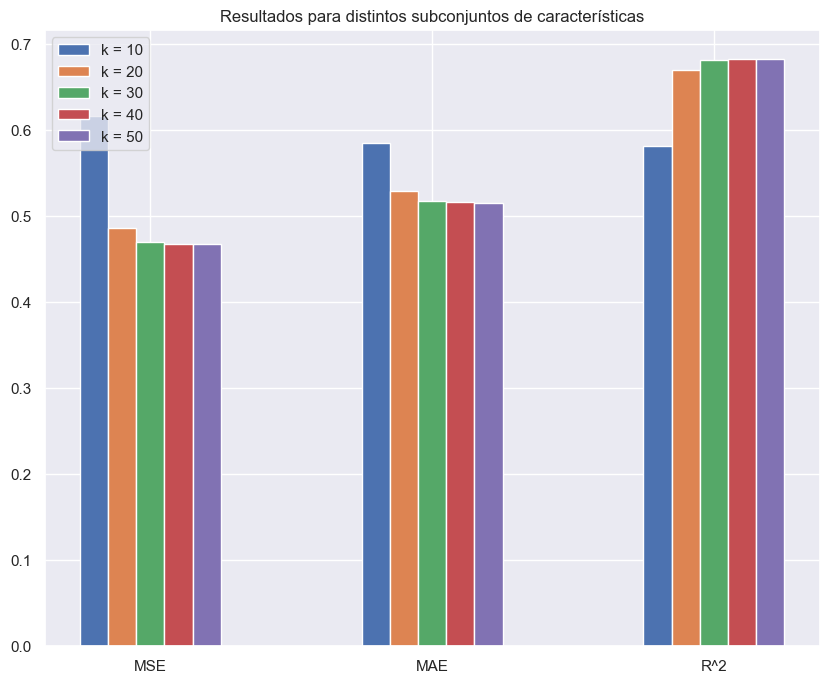

In [31]:
categorias = ['MSE', 'MAE', 'R^2']
titulos = ['k = 10', 'k = 20', 'k = 30', 'k = 40', 'k = 50']

tablaComparacion(Misf_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(Misf_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

Observamos que los mejores resultados los obtenemos cuando nos quedamos con las 40 características más relevantes, una vez se sigue aumentando el número de características a seleccionar los resultados ya se estancan. Por lo que guardamos dicho resultado en una variable.

In [32]:
Mifs_best = Misf_results[3][1:]

### Resultados de Pearson´s R

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.658549 │ 0.579636 │ 0.467594 │ 0.468925 │ 0.466871 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.604951 │ 0.563167 │ 0.515889 │ 0.516861 │ 0.514704 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.551356 │ 0.605135 │ 0.681525 │ 0.680604 │ 0.682014 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


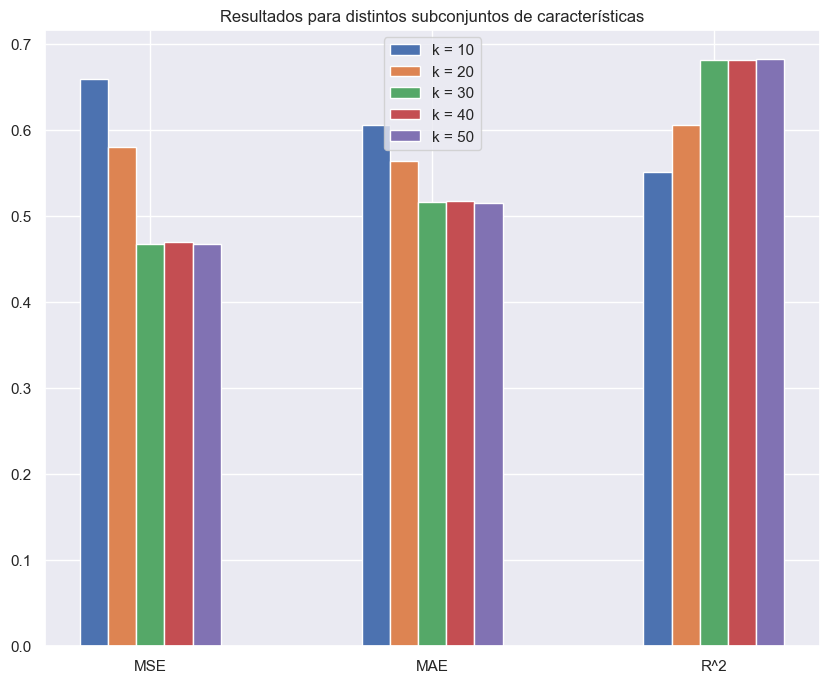

In [33]:
tablaComparacion(PearsonR_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(PearsonR_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

En este caso los mejores resultados se obtienen con 50 características, pero como son muy similares a con 30 características selecciono 30, reduciendo así bastante más la dimensionalidad.

In [34]:
PearsonR_best = PearsonR_results[2][1:]

### Resultados de F-Value

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.657701 │ 0.581362 │ 0.574848 │ 0.467762 │ 0.466609 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.604464 │ 0.563879 │ 0.561396 │ 0.516012 │ 0.514995 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.551962 │ 0.603952 │ 0.608363 │ 0.681426 │ 0.682176 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


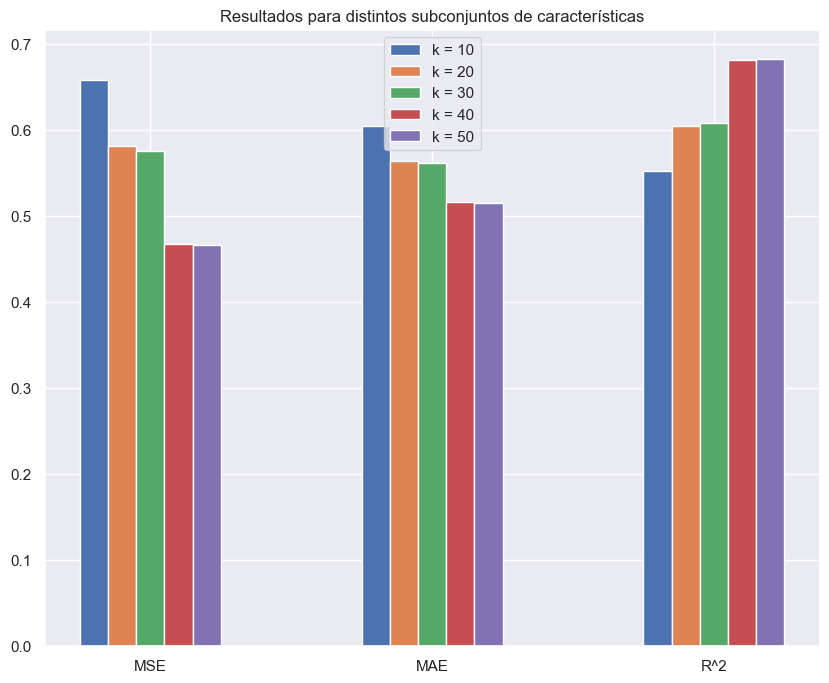

In [35]:
tablaComparacion(FValue_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(FValue_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

Para f-value de nuevo con 40 características basta, en este caso de hecho cuando se sigue aumentando el número de características los resultados se mantienen muy similares.

In [33]:
FValue_best = FValue_results[3][1:]

### Recursive Feature Elimination (RFE)

Este algoritmo funciona eliminando recursivamente las características menos importantes y construyendo el modelo con las características restantes.

El proceso típico de RFE es el siguiente:

1. Selecciona un modelo de aprendizaje automático inicial (por ejemplo, regresión lineal, SVM, árboles de decisión).
2. Entrena el modelo con todas las características disponibles.
3. Evalúa la importancia de cada característica según el modelo.
4. Elimina la característica menos importante.
5. Repite los pasos 2-4 hasta alcanzar el número deseado de características o hasta que todas las características hayan sido eliminadas.

RFE es un enfoque iterativo y se repite hasta que se alcanza un número específico de características o hasta que se cumple algún otro criterio de parada predefinido.

In [26]:
from sklearn.feature_selection import RFE

# Creamos y guardamos en una lista los distintos modelos con distintas características a quedarse (k)
Rfe = []

for k in range(10, 51, 10): # Número de características a seleccionar
    Rfe.append(RFE(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), n_features_to_select=k)) 
    Rfe[-1].fit(x_train, y_train_log)

In [27]:
# Aplicamos CV a nuestros subconjuntos para obtener sus métricas de error
Rfe_results = []

for i in range(len(Rfe)):
    Rfe_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, Rfe[i].transform(x_train), y_train_log, False))

Rfe_all = np.vstack((Rfe_results[0][1:], Rfe_results[1][1:], Rfe_results[2][1:], Rfe_results[3][1:], Rfe_results[4][1:]))

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.575276 │ 0.562232 │ 0.552185 │ 0.551462 │ 0.552959 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.579986 │ 0.573879 │ 0.567873 │ 0.567286 │ 0.567915 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.606009 │ 0.614923 │ 0.621832 │ 0.622341 │ 0.621295 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


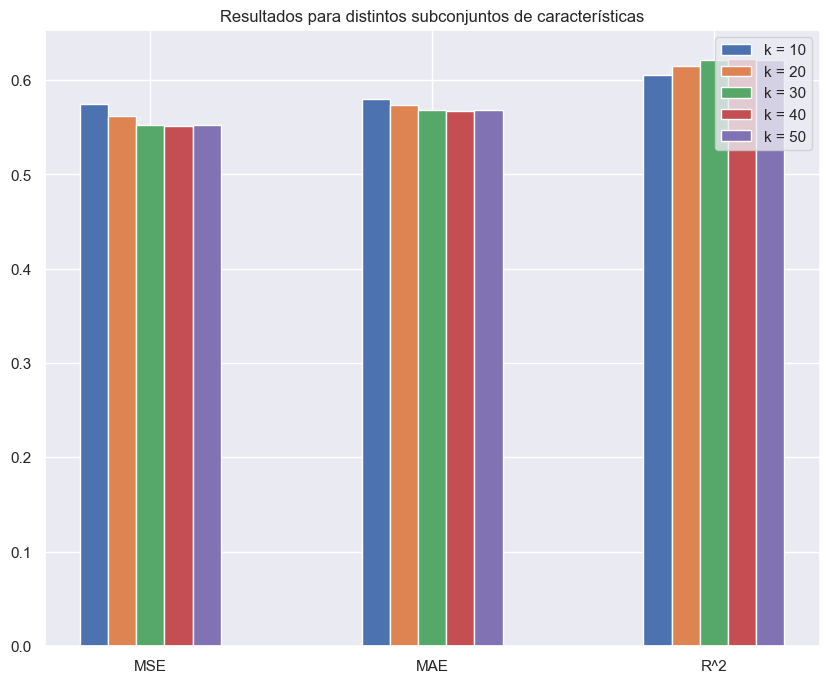

In [29]:
tablaComparacion(Rfe_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(Rfe_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

Usando RFE vemos que a partir de 30 características la mejora ya es mínima, por lo que seleccionamos dicho valor.

In [30]:
Rfe_best = Rfe_results[2][1:]

### Las Vegas Feature Selection Method

Para poder comprobar si dos instancias son inconsistentes necesitamos discretizar las variables, por un lado necesitamos ver si dos instancias tienen las mismas características y por otro si sus salarios son distintos. Para la parte de los salarios decido que dos salarios son distintos si y solo si la diferencia entre ambos es mayor al 10% del menor salario, antes de aplicarlo a VFS quiero ver cuantos salarios son "iguales" siguiendo este criterio.

Para la parte de comprobar si dos instancias tienen las mismas características tenemos obviamente que comparar estas una a una, la pregunta es: ¿Cuándo dos características son iguales?, la respuesta es que depende, para variables categóricas y discretas con pocos valores estas características deben coincidir de forma exacta, pero para las variables continuas o discretas con muchos valores a tomar debemos de hacer algún tipo de clustering inicial para tener un grupo de opciones posibles más reducido y que permita que dos instancias coincidan en tener las mismas características.

Las características continuas y/o que recibirán un tratamiento especial son las siguientes:

* Partidos: Ya discretizada, rango: 1-38 (Vitinha 2022 es ruido, unión de dos Vitinha)
* Minutos: Continua, mismo tratamiento que al salario
* xG: Continua, redondeo a las unidades/parsear a integer
* xG sin penaltis: Continua, redondeo a las unidades/parsear a integer
* xAG: Continua, redondeo a las unidades/parsear a integer
* Conducciones progresivas: Continua, mismo tratamiento que al salario
* Pases progresivos: Continua, mismo tratamiento que al salario
* Pases progresivos recibidos: Continua, mismo tratamiento que al salario
* Goles encajados: Continua, mismo tratamiento que al salario
* Disparos recibidos: Continua, mismo tratamiento que al salario
* Salvadas: Continua, mismo tratamiento que al salario
* Faltas cometidas: Continua, mismo tratamiento que al salario
* Faltas recibidas: Continua, mismo tratamiento que al salario
* Fueras de juego: Continua, mismo tratamiento que al salario
* Balones centrados: Continua, mismo tratamiento que al salario
* Intercepciones: Continua, mismo tratamiento que al salario
* Entradas ganadas: Continua, mismo tratamiento que al salario
* [Recuperaciones-Errores de control]: Continua, mismo tratamiento que al salario. Para Distancia tiros aparte redondeo a las unidades
* Valor equipo ini/fin: Discretizadas, el problema es que al haber 20 equipos por liga, 5 ligas y 6 temporadas distintas, tenemos 600 distintos valores posibles para estas variables, por lo que les daré el mismo tratamiento que al salario

In [88]:
# Truncamos estadísticas redondeando a las unidades
x_train_noNorm['xG'] = round(x_train_noNorm['xG'])
x_train_noNorm['xG sin penaltis'] = round(x_train_noNorm['xG sin penaltis'])
x_train_noNorm['xAG'] = round(x_train_noNorm['xAG'])
x_train_noNorm['Distancia tiros'] = round(x_train_noNorm['Distancia tiros'])

##### Distribución de las características que entrañan duda

In [86]:
import seaborn as sns

def histogramaDiscreto(valores, titulo, nulos=False):
    if nulos: valores = [valor for valor in valores if valor != 0]
    
    plt.figure(figsize=(8, 6))
    plt.hist(valores, bins=max(valores)-min(valores)+1, align='left', rwidth=0.8)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title(titulo)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def histogramaContinuo(data, titulo):
    sns.kdeplot(data, color='skyblue')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(titulo)
    plt.show()

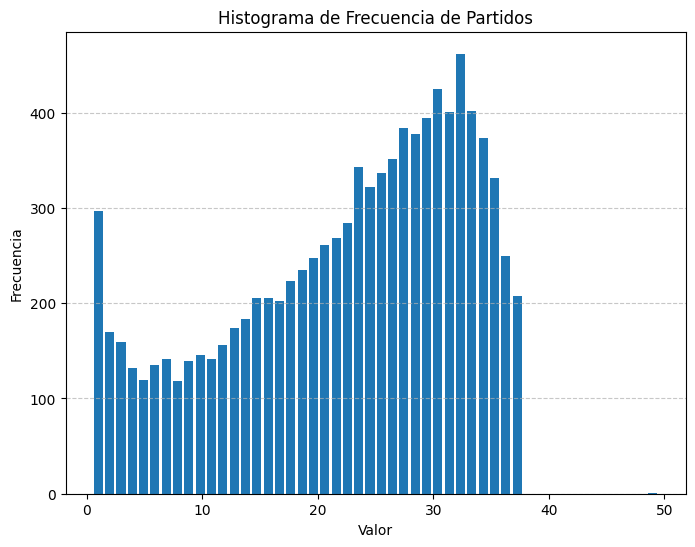

In [75]:
histogramaDiscreto(x_train_noNorm['Partidos'].astype(int), 'Histograma de Frecuencia de Partidos')

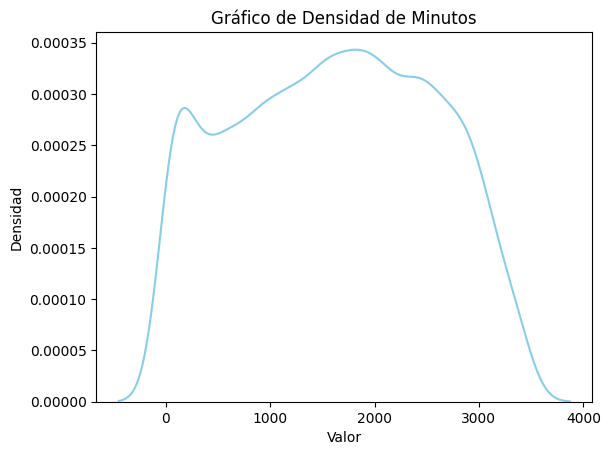

In [79]:
histogramaContinuo(x_train_noNorm['Minutos'].astype(int), 'Gráfico de Densidad de Minutos')

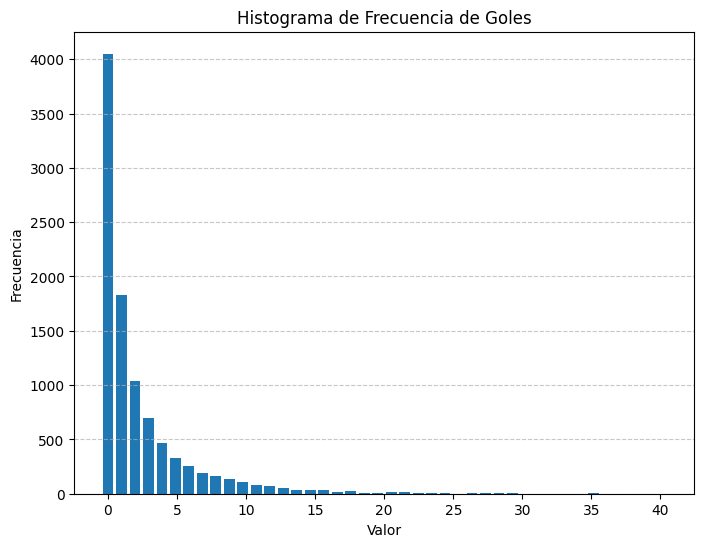

In [80]:
histogramaDiscreto(x_train_noNorm['Goles'].astype(int), 'Histograma de Frecuencia de Goles')

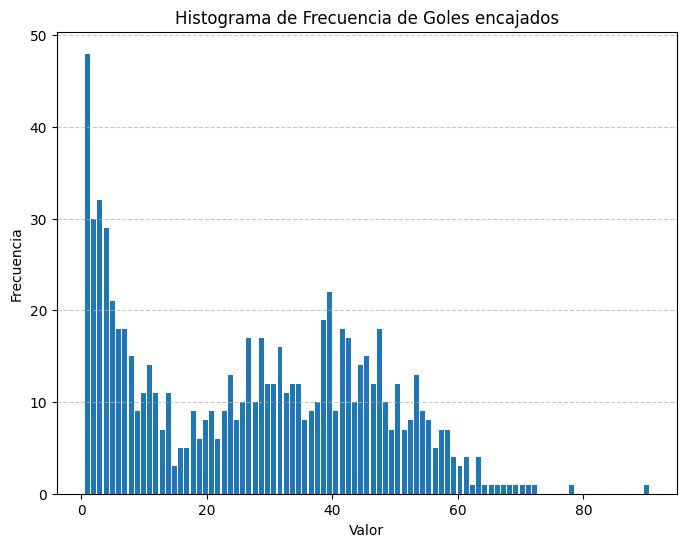

In [87]:
histogramaDiscreto(x_train_noNorm['Goles encajados'].astype(int), 'Histograma de Frecuencia de Goles encajados', True)

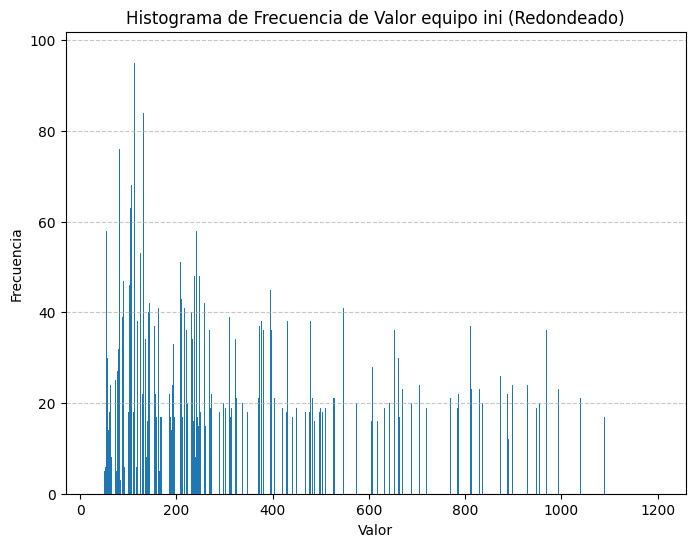

In [90]:
histogramaDiscreto(round(x_train_noNorm['Valor equipo ini']).astype(int), 'Histograma de Frecuencia de Valor equipo ini (Redondeado)')

##### Aplicación de LVF

Función para comparar las características continuas.

In [27]:
def comparaContinuas(a, b, umbral=0.1):
    if a < b: 
        mayor = b
        menor = a
    else:
        mayor = a
        menor = b

    return (mayor-menor) <= menor*umbral

In [28]:
iguales = 0
distintos = 0
salario = y_train[0]

for i in y_train:
    aux = comparaContinuas(salario, i)

    if aux: iguales+=1
    else: distintos+=1

print(f'Salarios iguales: {iguales}')
print(f'Salarios distintos: {distintos}')

Salarios iguales: 652
Salarios distintos: 9055


In [45]:
def comparaInstancias(a, b, features):
    # Filtra las posiciones que deben compararse
    posiciones_filtradas = np.where(features == 1)[0]

    # Compara los valores en esas posiciones y verifica si todos son iguales
    resultados_comparacion = a[posiciones_filtradas] == b[posiciones_filtradas]
    
    return resultados_comparacion.all()

def InconCheck(data, features):
    # Lógica para verificar la inconsistencia de los datos con las características seleccionadas
    inconsistency_count = 0

    for instance in data:
        matching_instances = [other for other in data if comparaInstancias(instance[:-1], other[:-1], features)]
        inconsistency_count += len(matching_instances) - max(len([i for i in matching_instances if i[-1] == label]) for label in set(instance[-1] for instance in matching_instances))
    
    inconsistency_rate = inconsistency_count / len(data)
    
    return inconsistency_rate 

In [91]:
def LVF(MAX_TRIES, dataset, n_features):
    C_act = n_features
    S_act = np.ones(n_features).astype(int)
    i_act = InconCheck(dataset, S_act)
    L = [S_act]

    for i in range(MAX_TRIES):
        S = np.random.choice([0, 1], size=n_features)
        C = np.count_nonzero(S)

        if(C < C_act):
            i = InconCheck(dataset, S)

            if(i <= i_act):
                S_act = S
                C_act = C
                i_act = i
                L = [S_act]

        elif(C == C_act):
            if(all(S != s for s in L)): L.append(S)
    
    return S_act

In [ ]:
dataset = pd.concat([x_train, y_train_log], axis=1)

S_best = LVF(77*x_train.shape[1], dataset.to_numpy(), x_train.shape[1])